The risk of overfitting is less in SVM compared to logistics regression


SVM can be of two types:

Linear SVM: Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.

Non-linear SVM: Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.

## Linear Support Vector Machine Classification

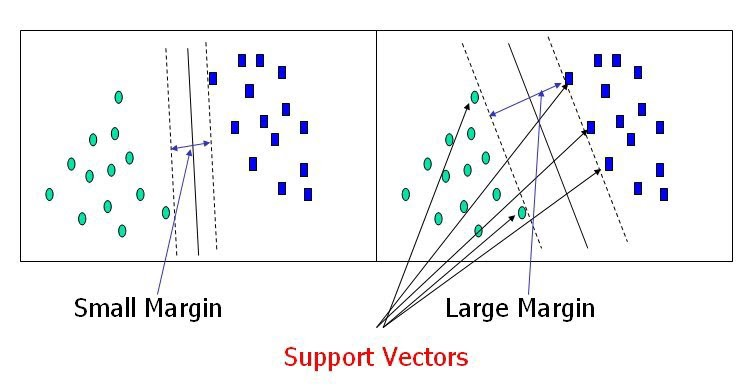

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [7]:
X, y = make_blobs(n_samples=500, centers=2, random_state=20) # Data points scateered around two points

In [8]:
X, y

(array([[ 6.05487413e+00,  4.83917799e+00],
        [ 3.30025999e+00,  6.92264204e+00],
        [ 5.51231580e+00,  5.37854819e+00],
        [ 6.69042999e+00,  6.42759884e+00],
        [ 2.29034449e+00,  8.11011278e+00],
        [ 2.43925569e+00,  8.78538034e+00],
        [ 7.46559415e+00,  6.01476085e+00],
        [ 7.50098576e+00,  4.98996139e+00],
        [ 8.17041088e+00,  4.56323138e+00],
        [ 7.58527327e+00,  7.73963658e+00],
        [ 8.39610912e+00,  6.12838910e+00],
        [ 1.49704227e+00,  6.91368146e+00],
        [ 1.65394605e+00,  9.87490521e+00],
        [ 8.04398719e+00,  8.61892674e+00],
        [ 2.11618757e+00,  8.74298179e+00],
        [ 7.98001100e+00,  4.88780791e+00],
        [-1.78650270e-01,  8.29570927e+00],
        [ 7.73680293e+00,  5.90731969e+00],
        [ 2.23353713e+00,  9.60175963e+00],
        [ 1.54718391e+00,  7.36395988e+00],
        [ 6.89553922e+00,  6.53750691e+00],
        [ 7.30778179e+00,  4.93063640e+00],
        [ 1.86140464e+00,  7.725

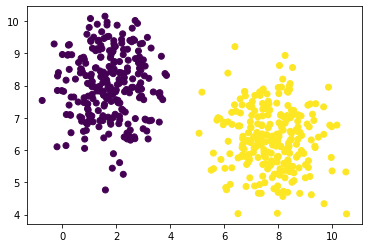

In [10]:
plt.scatter(X[:,0],X[:,1],c=y);

In [11]:
# It is linearly seperable so Linear SVC can be used

In [13]:
from sklearn.svm import SVC

Parameters:

Cfloat, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

kernel
{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

degreeint, default=3
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels

In [14]:


svc_lin = SVC(kernel='linear')

In [15]:
svc_lin = svc_lin.fit(X,y)

In [16]:
svc_lin

SVC(kernel='linear')

In [17]:
# Plotting the surface

def plot_SVC_surface(model):
    
    # Identifying Axis

    ax=plt.gca()

    x_lim=ax.get_xlim() 
    y_lim=ax.get_ylim()

   

    # Creating a collection of x and y values wihtin this range

    xx=np.linspace(x_lim[0],x_lim[1],50)
    yy=np.linspace(y_lim[0],y_lim[1],50)
    
    # Creating a meshgrid using these xx and yy

    XX,YY=np.meshgrid(xx,yy) 

    # Creatign a stack of these

    xy=np.vstack([XX.ravel(),YY.ravel()]).T



    # Creating decision boundary using these values

    Z=model.decision_function(xy).reshape(XX.shape)
    

    ax.contour(XX, YY, Z,colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '--'])

    # plotting  support vectors obtained 
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=200,
               linewidth=1, facecolors='none', edgecolors='none')
    plt.show()

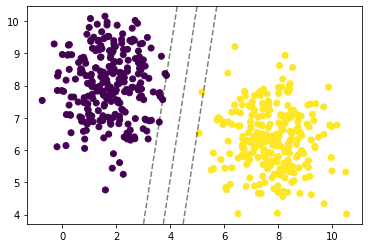

In [23]:
plt.scatter(X[:,0],X[:,1],c=y);
plot_SVC_surface(svc_lin)

In [24]:
## Using regularisation parameter

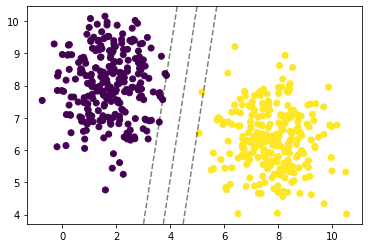

In [26]:
svc_lin = SVC(kernel='linear', C=1) # C=1 is the default value
svc_lin = svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y);
plt.title(" SVC:linear 1")
plot_SVC_surface(svc_lin)

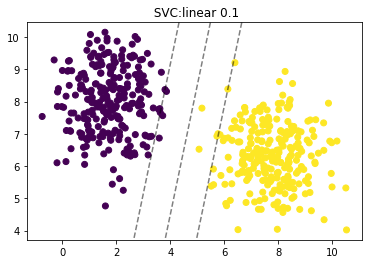

In [30]:
svc_lin = SVC(kernel='linear', C=0.1) 
svc_lin = svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y);
plt.title(" SVC:linear 0.1")
plot_SVC_surface(svc_lin)

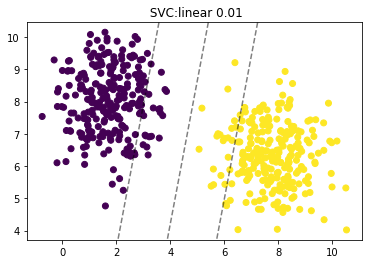

In [34]:
svc_lin = SVC(kernel='linear', C=0.01) # Lower the C value wider the margins
svc_lin = svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y);
plt.title(" SVC:linear 0.01")
plot_SVC_surface(svc_lin)

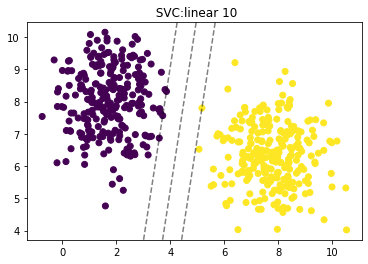

In [35]:
svc_lin = SVC(kernel='linear', C=10) # When c values increased margin is not shrinking bcoz of the presence of the support vector
svc_lin = svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y);
plt.title(" SVC:linear 10")
plot_SVC_surface(svc_lin)

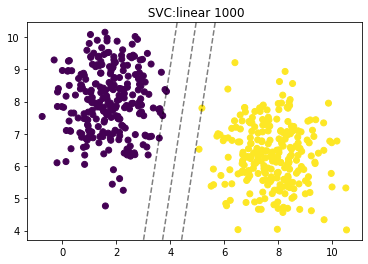

In [33]:
svc_lin = SVC(kernel='linear', C=1000) 
svc_lin = svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y);
plt.title(" SVC:linear 1000")
plot_SVC_surface(svc_lin)

## Non linear SVC

In [37]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, random_state=30)

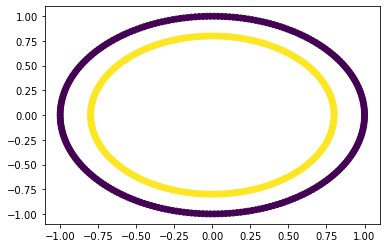

In [38]:
plt.scatter(X[:,0],X[:,1],c=y);

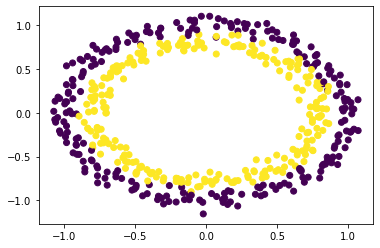

In [41]:
X, y = make_circles(n_samples=500, random_state=30, noise=0.05) # With noise
plt.scatter(X[:,0],X[:,1],c=y);

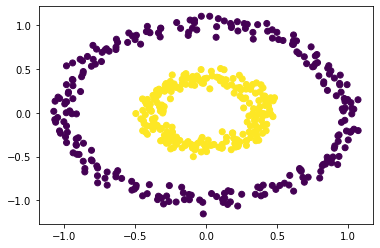

In [42]:
X, y = make_circles(n_samples=500, random_state=30, noise=0.05, factor=0.4)
plt.scatter(X[:,0],X[:,1],c=y);

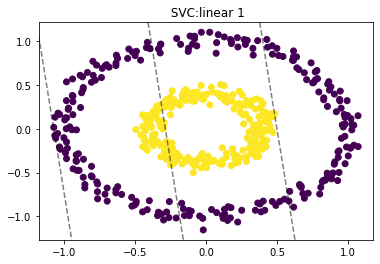

In [44]:
svc_lin = SVC(kernel='linear', C=1) 
svc_lin = svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y);
plt.title(" SVC:linear 1")
plot_SVC_surface(svc_lin)

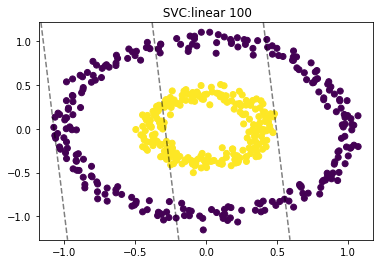

In [45]:
svc_lin = SVC(kernel='linear', C=100)  # So linear is not working with this dataset 
svc_lin = svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y);
plt.title(" SVC:linear 100")
plot_SVC_surface(svc_lin)

In [46]:
# We need to use non linear kernels for classification

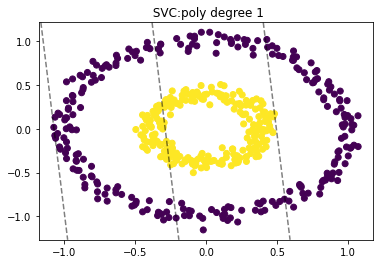

In [57]:
svc_poly = SVC(kernel='poly', degree=1) # We are using polynomial but it's linear
svc_poly = svc_poly.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y);
plt.title(" SVC:poly degree 1")
plot_SVC_surface(svc_poly)

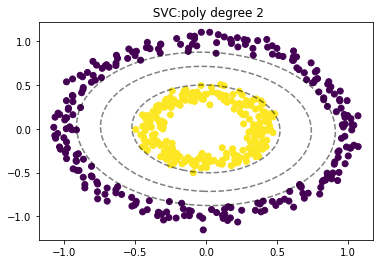

In [59]:
svc_poly = SVC(kernel='poly', degree=2) # polynomial with degree 2 works
svc_poly = svc_poly.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y);
plt.title(" SVC:poly degree 2")
plot_SVC_surface(svc_poly)

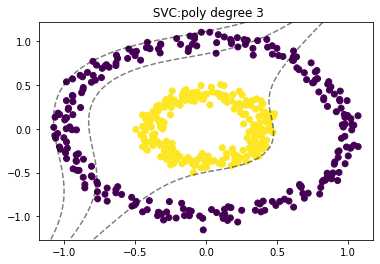

In [60]:
svc_poly = SVC(kernel='poly', degree=3)
svc_poly = svc_poly.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y);
plt.title(" SVC:poly degree 3")
plot_SVC_surface(svc_poly)

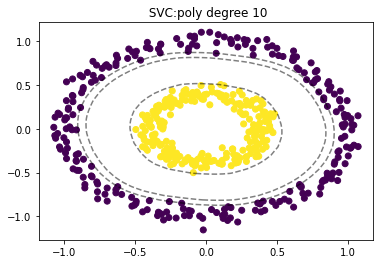

In [61]:
svc_poly = SVC(kernel='poly', degree=10)
svc_poly = svc_poly.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y);
plt.title(" SVC:poly degree 10")
plot_SVC_surface(svc_poly)

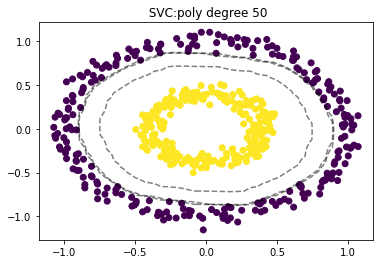

In [62]:
svc_poly = SVC(kernel='poly', degree=50)
svc_poly = svc_poly.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y);
plt.title(" SVC:poly degree 50")
plot_SVC_surface(svc_poly)

In [72]:
## with sigmoid Kernel


#Sigmoid Kernel: this function is equivalent to a two-layer, perceptron model of the neural network, which is used as an activation function for artificial neurons

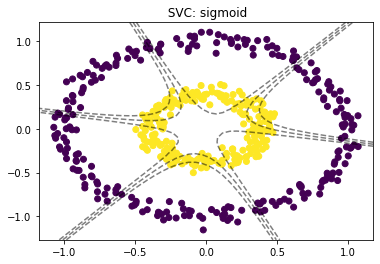

In [68]:
svc_sig = SVC(kernel='sigmoid')
svc_sig = svc_sig.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y);
plt.title(" SVC: sigmoid")
plot_SVC_surface(svc_sig)

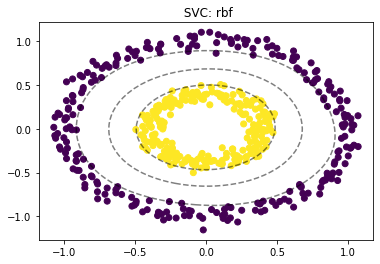

In [71]:
## With rbf(radial basis function) kernel
svc_rbf = SVC(kernel='rbf')
svc_rbf = svc_rbf.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y);
plt.title(" SVC: rbf")
plot_SVC_surface(svc_rbf)

In [73]:
# bY DEFAULT KERNEL IS RBF